# **Departemen Sales**

## Business Understanding

Pricing strategi merupakan metode yang digunakan perusahaan untuk menentukan harga produk. Strategi penetapan harga sifatnya sangatlah penting bagi perkembangan bisnis perusahaan. Sebab, dengan menetapkan harga yang tepat, perusahaan bisa mendapatkan angka demand produk yang tinggi dan penjualan akan ikut meningkat.
Salah satu cara untuk menetapkan harga produk yang sesuai, perusahaan dapat melakukan riset dari hasil penjualan sebelumnya. Oleh karena itu dibutuhkan data penjualan produk, adapun data yang digunakan berasal dari tabel order_items serta ditambah beberapa variable dari table product dan table order, variable tersebut antara lain tersebut antara lain:
*   **product_name** = Nama produk
*   **product_category** = Kategori produk
*   **product_brands** = Merek produk 
*   **sale_price** = Harga jual produk 
*   **num_of_item** = Jumlah item produk yang dipesan
*   **total_price** = Total pembelian



## Data Understanding

In [ ]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ruangguru/finalproject/datafix2.csv')

In [ ]:
data.head()

,product_name,product_category,product_brand,sale_price,num_of_item,gender,total_price
0,Carhartt Men's Big-Tall Lightweight Thermal Kn...,Tops & Tees,Carhartt,31.950001,1,M,31.950001
1,Armani Exchange Zippered Logo Jacket,Fashion Hoodies & Sweatshirts,A:X Armani Exchange,128.000000,1,F,128.000000
2,Speedo Women's X-Ray Vision Extreme Back Endur...,Swim,Speedo,64.949997,4,F,259.799988
3,Smartwool NEW Women's PhD Outdoor Ultra Light ...,Active,SmartWool,15.950000,3,F,47.849999
4,Allegra K Mens Elastic Waist Patch Pockets Str...,Pants,Allegra K,13.700000,3,M,41.099999


-- Insight --

---



Sebelum data diolah dengan menggunakan python, dilakukan proses pemilihan data dengan menggunakan query SQL adapun ketentuan-ketentuan dalam pemilihan data antara lain:
*   Data transaksi yang digunakan hanya pada tahun 2020 saja
*   Data transaksi yang digunakan hanya pada produk yang telah selesai dalam proses pembelian (Status Complete)
*   Proses penanganan duplikat product_name sudah dilakukan dengan query SQL



In [ ]:
data.shape

(24413, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24413 entries, 0 to 24412
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      24413 non-null  object 
 1   product_category  24413 non-null  object 
 2   product_brand     24413 non-null  object 
 3   sale_price        24413 non-null  float64
 4   num_of_item       24413 non-null  int64  
 5   gender            24413 non-null  object 
 6   total_price       24413 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
data.isna().sum()

product_name        0
product_category    0
product_brand       0
sale_price          0
num_of_item         0
gender              0
total_price         0
dtype: int64

-- Insight --

---
Terdapat 24413 baris dan 7 kolom dengan type data seperti interger, object dan float. Tidak terdapat missing value pada data, sehingga tidak perlu dilakukan penanganan missing value.

In [ ]:
# menambahkan kolom total_price

x = data[['product_name']].count()
total_price = []
for i in x:
  total_price.append(data['sale_price'] * data['num_of_item'])

total_price

[0         31.950001
 1        128.000000
 2        259.799988
 3         47.849999
 4         41.099999
             ...    
 24408    100.000000
 24409     89.980003
 24410    126.000000
 24411     31.000000
 24412    359.799988
 Length: 24413, dtype: float64]

In [ ]:
# Mengubah total_price kedalam bentuk dataframe dan mengubah total_price 
# kolom dengan menggunakan Transpose matrix

total_price1 = pd.DataFrame(total_price)

total_price2 = total_price1.T
total_price2.head()

,0
0,31.950001
1,128.000000
2,259.799988
3,47.849999
4,41.099999


In [ ]:
# Menggabungkan kolom total_price dengan data

data1 = data.assign(
    total_price = total_price2
)
data1.head()

,product_name,product_category,product_brand,sale_price,num_of_item,gender,total_price
0,Carhartt Men's Big-Tall Lightweight Thermal Kn...,Tops & Tees,Carhartt,31.950001,1,M,31.950001
1,Armani Exchange Zippered Logo Jacket,Fashion Hoodies & Sweatshirts,A:X Armani Exchange,128.000000,1,F,128.000000
2,Speedo Women's X-Ray Vision Extreme Back Endur...,Swim,Speedo,64.949997,4,F,259.799988
3,Smartwool NEW Women's PhD Outdoor Ultra Light ...,Active,SmartWool,15.950000,3,F,47.849999
4,Allegra K Mens Elastic Waist Patch Pockets Str...,Pants,Allegra K,13.700000,3,M,41.099999


-- Insight --

---

Variable total_price ditambahkan pada data untuk melihat total uang yang harus dikeluarkan oleh user dalam membeli produk. Untuk mendapatkan variable total_price dilakukan perhitungan dengan mengkalikan variable sale_price dan num_of_item


## Data Preparation

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24413 entries, 0 to 24412
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      24413 non-null  object 
 1   product_category  24413 non-null  object 
 2   product_brand     24413 non-null  object 
 3   sale_price        24413 non-null  float64
 4   num_of_item       24413 non-null  int64  
 5   gender            24413 non-null  object 
 6   total_price       24413 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
data1.isna().sum()

product_name        0
product_category    0
product_brand       0
sale_price          0
num_of_item         0
gender              0
total_price         0
dtype: int64

In [ ]:
# Mengubah isi kolom gender menjadi bentuk numerik
# Mengubah Male menjadi 1 dan Female menjadi 0

data1.gender.replace(to_replace=dict(M=1, F=0), inplace=True)

In [ ]:
data1[['gender']].head()

,gender
0,1
1,0
2,0
3,0
4,1


In [ ]:
# Mencari jumlah unik value untuk setiap variable yang ada

for feature in data1.columns:
    print(
        f"- num of unique values in `{feature}`:",
        data1[feature].nunique()
    )

- num of unique values in `product_name`: 14837
- num of unique values in `product_category`: 26
- num of unique values in `product_brand`: 2191
- num of unique values in `sale_price`: 2948
- num of unique values in `num_of_item`: 4
- num of unique values in `gender`: 2
- num of unique values in `total_price`: 5632


In [ ]:
# Mengelompokkan data numerik dan kategorikal

numerical_features = data1.select_dtypes(include="number").columns.tolist() 
categorical_features = data1.select_dtypes(include="object").columns.tolist() 

print("Numerical features:")
pprint(numerical_features)

print("Categorical features:")
pprint(categorical_features, compact=True) 

Numerical features:
['sale_price', 'num_of_item', 'gender', 'total_price']
Categorical features:
['product_name', 'product_category', 'product_brand']


In [ ]:
# Menampilkan summ statistics untuk data kategorikal

data1[categorical_features].describe().T

,count,unique,top,freq
product_name,24413,14837,7 For All Mankind Men's Standard Classic Strai...,8
product_category,24413,26,Intimates,1815
product_brand,24413,2191,Allegra K,864


In [ ]:
# Menampilkan summ statistics untuk data numerikal

data1[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
sale_price,24413.0,59.766208,65.253596,0.02,24.5,39.990002,69.949997,999.0
num_of_item,24413.0,2.013845,1.087619,1.00,1.0,2.000000,3.000000,4.0
gender,24413.0,0.511613,0.499875,0.00,0.0,1.000000,1.000000,1.0
total_price,24413.0,120.191009,160.861525,0.02,36.0,69.949997,140.000000,3612.0


Handling outlier

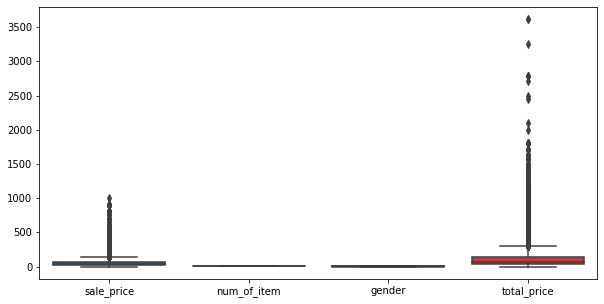

In [ ]:
# Melihat outlier pada dataset

plt.figure(figsize=(10,5))
sns.boxplot(data = data1)

-- Insight --

---

Dapat dilihat bahwa terdapat ouiler oada data sale_price dan total_price, sehingga perlu dilakukan handling outlier untuk meminimalisir data yang memiliki nilai outlier


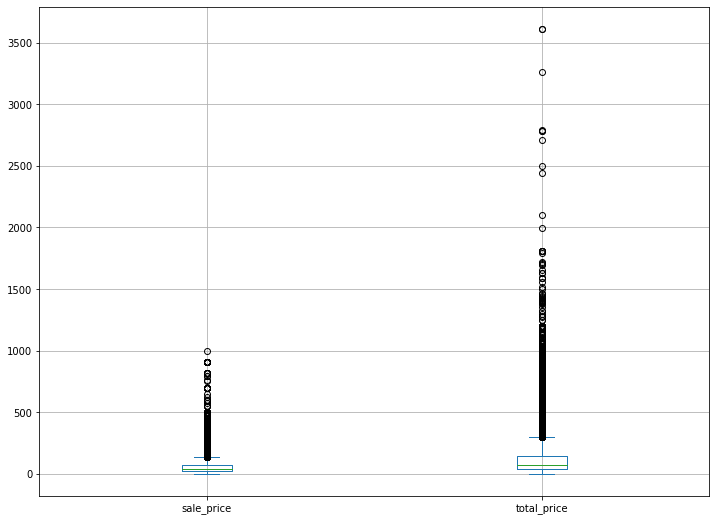

In [ ]:
# Melihat outlier pada sale_price dan total_price

data[['sale_price','total_price']].plot(kind="box", figsize=(12, 9))
plt.grid(True)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


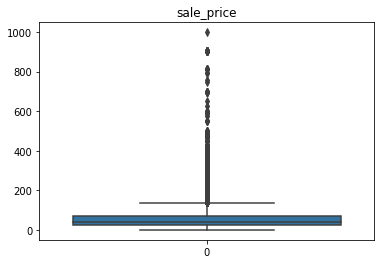

In [ ]:
#Membuat Boxplot pada sale_price untuk melihat outlier lebih jelas

plt.title("sale_price")
print(sns.boxplot(data=data['sale_price']))

AxesSubplot(0.125,0.125;0.775x0.755)


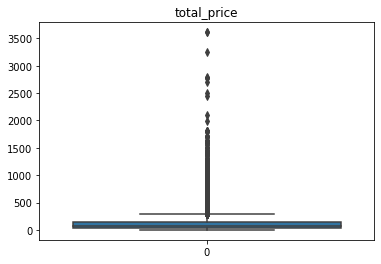

In [ ]:
# Membuat Boxplot pada total_price untuk melihat outlier lebih jelas

plt.title("total_price")
print(sns.boxplot(data=data['total_price']))

In [ ]:
#Handling outiler menggunakan metode IQR untuk data sale_price

sale_price_fix = data[['sale_price']]

Q1 = sale_price_fix.quantile(q=.25)
Q3 = sale_price_fix.quantile(q=.75)
IQR = sale_price_fix.apply(stats.iqr)

data_iqr_sale = sale_price_fix[~((sale_price_fix < (Q1-1.5*IQR)) | (sale_price_fix > (Q3+1.5*IQR))).any(axis=1)]

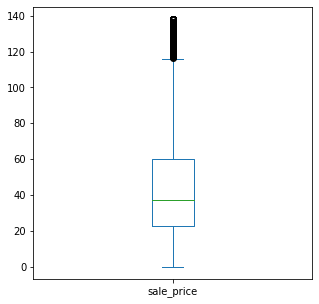

In [ ]:
data_iqr_sale.plot(kind='box', figsize=(5,5))
plt.show()

In [ ]:
#Handling outiler menggunakan metode IQR untuk data total_price

num_of_item_fix = data[['total_price']]

Q1 = num_of_item_fix.quantile(q=.25)
Q3 = num_of_item_fix.quantile(q=.75)
IQR = num_of_item_fix.apply(stats.iqr)

data_iqr_item = num_of_item_fix[~((num_of_item_fix < (Q1-1.5*IQR)) | (num_of_item_fix > (Q3+1.5*IQR))).any(axis=1)]

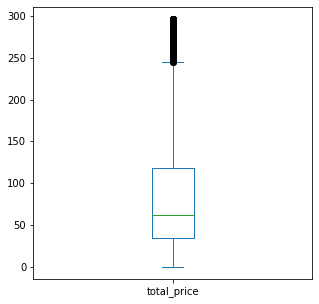

In [ ]:
data_iqr_item.plot(kind='box', figsize=(5,5))
plt.show()

-- Insight --


---

Untuk melakukan proses handling outlier variable sale_price dan total_price dilakukan metode IQR, dapat dilihat bahwa sudah tidak terlalu banyak nilai outlier pada data

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(15, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

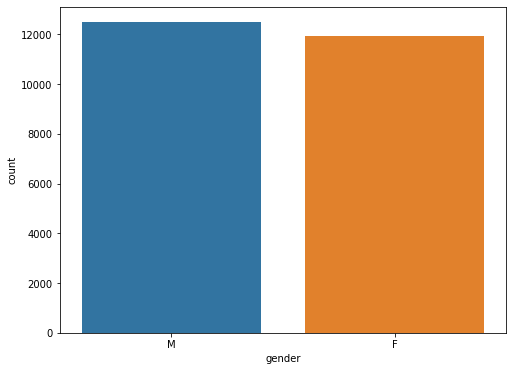

In [ ]:
#visualisasi dengan gender

plot_count(x="gender", data=data)

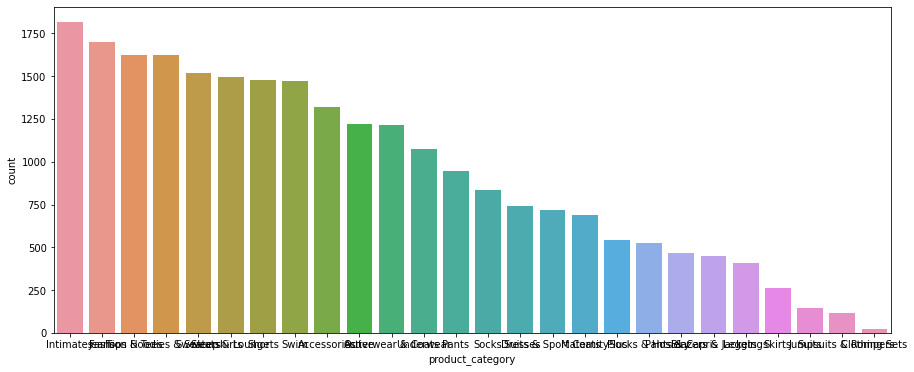

In [ ]:
#visualisasi dengan product_category

plot_count(x="product_category", data=data)

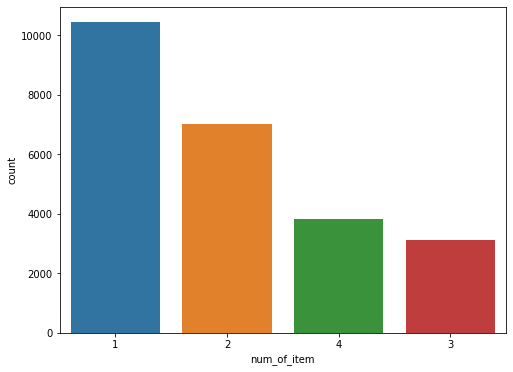

In [ ]:
# Visualisasi dengan num_of_item

plot_count(x="num_of_item", data=data)

-- Insight --


---
Berikut penjelasan mengenai visualisasi data
*   Visualisasi gender : Dapat dilihat bahwa kebanyakan transaksi yang dilakukan oleh male namun rentang transaksi antara femali dan male tidak terlalu jauh
*   visualisasi produc_category : Penjualan terbanyak ada pada category itimate
*   visualisasi num_of_item : Kebanyak customer membeli 1 barang




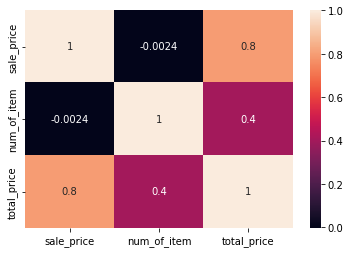

In [ ]:
# Visualisasikan hubungan antara 

sns.heatmap(data[['sale_price', 'num_of_item', 'total_price']].corr(), annot=True)
plt.show()

-- Insight --


---
Korelasi antara variable sale_price dan total_price sangat baik, korelasi antara sale_price dan num_of_item kurang baik, dan korelasi dan antara total_price dan num_of_item cukup baik

In [ ]:
# Penggabungan data yang a

datafix = data[['product_category','product_department','sale_price','num_of_item']]
datafix.head()

,product_category,product_department,sale_price,num_of_item
0,Swim,1,78.000000,3
1,Jeans,1,34.040001,1
2,Jeans,1,34.040001,1
3,Jeans,1,34.040001,1
4,Plus,1,15.990000,2


In [ ]:
# PROSES SPLIT DATA

#Pertama, buat variabel x dan y
#variable y atau variable dependen yang digunakan yaitu product_category

x = data1.drop(columns='product_name')
y = data1['product_name']

In [ ]:
#Split data menjadi training and testing dengan porsi 80:20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
#Cek shape dari data training dan testing

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19530, 6)
(19530,)
(4883, 6)
(4883,)


-- Insight --


---
Dilakukan proses spilt data yang digunakan untuk memisahkan data training dan data testing, proses ini dilakukan untuk modeling pada data supervised learning. Namun disini akan dilakukan proses modeling pada data unsupervised learning, sehingga proses spilt tidak perlu untuk dilakukan


In [ ]:
# Pengelompokan data yang akan dilakuakn proses modeling 

dataolah = data[['sale_price','num_of_item','total_price']]
dataolah.head()


,sale_price,num_of_item,total_price
0,31.950001,1,31.950001
1,128.000000,1,128.000000
2,64.949997,4,259.799988
3,15.950000,3,47.849999
4,13.700000,3,41.099999


-- Insigth --


---

Pengelompokan data dilakukan sebelum proses modeling, variable yang akan dimasukan kedalam proses modeling yaitu sale_price, num_of_item dan total_price


## Modeling

Algoritma K-Means Clsutering digunakan untuk proses modeling pada data, karena dari beberapa penelitian mengenai pengolahan data transaksi menggunakan algoritma K-Means

In [ ]:
# MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataolah)
normalisasi = scaler.transform(dataolah)
datafix = pd.DataFrame(normalisasi)
datafix.columns =['sale_price','num_of_item','total_price']
datafix.head()

,sale_price,num_of_item,total_price
0,0.031963,0.000000,0.008840
1,0.128111,0.000000,0.035432
2,0.064996,1.000000,0.071922
3,0.015946,0.666667,0.013242
4,0.013694,0.666667,0.011373


-- Insight --


---
Proses normalisasi perlu dilakukan untuk model data clustering, proses ini dilakukan untuk mengubah data dalam rentang nilai 0 sampai 1.


In [ ]:
# Elbow method

ssd = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=11)
    model.fit(datafix)
    ssd.append(model.inertia_)

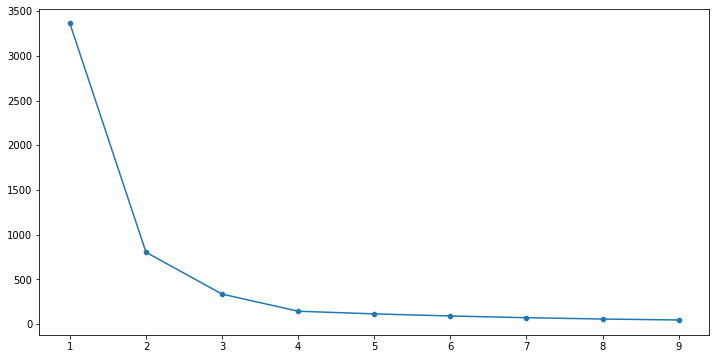

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 10), y=ssd)
sns.scatterplot(x=range(1, 10), y=ssd)
plt.xticks(range(1, 10))
plt.show()

-- Insight --

---

Metode Elbow digunakan untuk menentukan nilai K yang optimal. Pada grafik diatas, nilai k yang optimal yaitu 2 karena memiliki sudut terkecil selain itu setelah nilai 2 nilai seterusnya memiliki grafik yang linear. Sehingga dalam perhitungan K-Means nilai K yang akan digunakan yaitu 2, 4, dan 6

In [ ]:
K = 2
kmeans_2 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_2.fit(datafix)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.369s


In [ ]:
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_4.fit(datafix)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.939s


In [ ]:
K = 6
kmeans_6 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_6.fit(datafix)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 1.269s


In [ ]:
datahasil = data1.assign(
    clusters_of_2=kmeans_2.predict(datafix),
    clusters_of_4=kmeans_4.predict(datafix),
    clusters_of_6=kmeans_6.predict(datafix),
)

with pd.option_context("display.max_columns", None):
    display(datahasil.head())

,product_name,product_category,product_brand,sale_price,num_of_item,gender,total_price,clusters_of_2,clusters_of_4,clusters_of_6
0,Carhartt Men's Big-Tall Lightweight Thermal Kn...,Tops & Tees,Carhartt,31.950001,1,1,31.950001,0,2,1
1,Armani Exchange Zippered Logo Jacket,Fashion Hoodies & Sweatshirts,A:X Armani Exchange,128.000000,1,0,128.000000,0,2,1
2,Speedo Women's X-Ray Vision Extreme Back Endur...,Swim,Speedo,64.949997,4,0,259.799988,1,1,3
3,Smartwool NEW Women's PhD Outdoor Ultra Light ...,Active,SmartWool,15.950000,3,0,47.849999,1,3,0
4,Allegra K Mens Elastic Waist Patch Pockets Str...,Pants,Allegra K,13.700000,3,1,41.099999,1,3,0


In [ ]:
datahasil.tail()

,product_name,product_category,product_brand,sale_price,num_of_item,gender,total_price,clusters_of_2,clusters_of_4,clusters_of_6
24408,Bjorn Borg Men's Side Stretch Boxer Brief,Underwear,Bjorn Borg,25.000000,4,1,100.000000,1,1,3
24409,Rip Curl Untapped Walk Shorts - Black,Shorts,Rip Curl,44.990002,2,1,89.980003,0,0,2
24410,Fuzzdandy - Mens Cable Knit Reindeer Christmas...,Sweaters,Fuzzdandy,42.000000,3,1,126.000000,1,3,0
24411,Duofold Men's Big-Tall Mid Weight Bottom,Underwear,Duofold,31.000000,1,1,31.000000,0,2,1
24412,Men's Double Breasted Wool Black Three-Quarter...,Outerwear & Coats,Cianni,89.949997,4,1,359.799988,1,1,3


-- Insight --


---

Tabel diatas merupakan hasil perhitungan algoritma K-means dengan nilai K-2, K-4, dan K-6. Dapat dilihat pada data index ke-0 untuk K-2 masuk kedalam cluster 0, K-4 masuk kedalam cluster 2, dan K-6 masuk kedalam cluster 1

## Evaluation

In [ ]:
#evaluasi silhouette coefficient

X_scaled_sample = datafix[0:int(len(datafix)*0.2)]

In [ ]:
silhouette_scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=11)
    model.fit(X_scaled_sample)
    silhouette_scores.append(silhouette_score(X_scaled_sample, model.labels_))

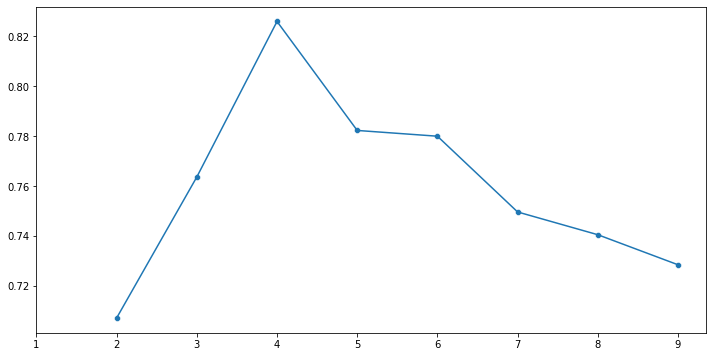

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 10), y=silhouette_scores)
sns.scatterplot(x=range(2, 10), y=silhouette_scores)
plt.xticks(range(1, 10))
plt.show()

-- Insight --

---

Dari hasil perhitungan slhouette coefficeint nilai K tertinggi ada pada K-4 dengan nilai silhouette 0.85, dari nilai tersebut menurut Kaufman dan Rousseeuw dapat dikatakan bahwa cluster yang terbentuk masuk kedalam Strong Cluster

In [ ]:
# visualisasi hasil cluster

label = []
nilai = []
cluster = datahasil['clusters_of_4'].nunique()
for i in range(cluster):
  nilai.append(datahasil[datahasil['clusters_of_4'] == i]['product_name'].count())
  label.append("Cluster" + str(i))


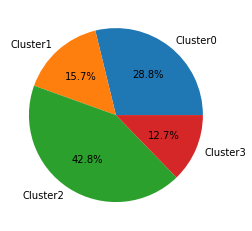

In [ ]:
plt.pie(nilai, labels = label, autopct='%2.1f%%')
plt.show()

-- Insight --


---
Dari visualisasi pie chart, didapatkan bahwa cluster0 memiliki total produk 28.8 %, cluster1 memiliki total produk 15.7%, cluster2 memiliki total produk 42.8%, cluster1 memiliki total produk 12.7%,


## Conclusion



Dengan menggunakan data berupa penjualan produk, dapat dilakukan proses modeling pada data dengan menggunakan metode clustering. Metode clustering yang digunakan yaitu algoritma K-Means dan evaluasi pengujian dengan menggunakan Silhouette Coefficient. Dari hasil pengujian didapatkan nilai silhouette tertinggi yaitu 0.85 pada K = 4, yang dimana:
*   cluster 2 merupakan produk yang memiliki tingkat penjualan sangat tinggi
*   cluster 0 merupakan produk yang memiliki tingkat penjualan cukup tinggi
*   cluster 3 merupakan produk yang memiliki tingkat penjualan kurang tinggi
*   cluster 1 merupakan produk yang memiliki tingkat penjualan sangat rendah

Sehingga menurut Kaufman dan Rousseeuw dengan nilai silhouette 0.85 dapat dinyatakan bahwa cluster yang terbentuk merupakan Cluster Strong Stuctur, karena memiliki nilai silhouette lebih dari 0.7.

 

Dari hasil clustering tersebut, perusahaan dapat menentukan pricing strategi sesuai dengan hasil cluster yang didapatkan, untuk produk yang masuk kedalam cluster 2 dan cluster 0 perusahaan dapat meningatkan  harga jual agar perusahaan mendapatkan profit yang lebih tinggi, sedangkan untuk produk yang masuk kedalam cluster 3 dan cluster 1 perusahaan dapat menurunkan harga produk atau memberikan diskon. Namun lebih baik perusahaan melakukan risset lebih lanjut mengapa produk tersebut memilik tingkat penjualan yang rendah